<a href="https://colab.research.google.com/github/AI-Junction/Histopathologic-Cancer-Detection/blob/master/Histopathologic-Cancer-Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Check memory allocation to this sesssion

In [1]:
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay         359G   18G  323G   6% /
tmpfs           6.4G     0  6.4G   0% /dev
tmpfs           6.4G     0  6.4G   0% /sys/fs/cgroup
tmpfs           6.4G  8.0K  6.4G   1% /var/colab
/dev/sda1       365G   22G  344G   6% /opt/bin
shm             6.0G     0  6.0G   0% /dev/shm
tmpfs           6.4G     0  6.4G   0% /sys/firmware


Confirm TensorFlow can see the GPU

Simply select "GPU" in the Accelerator drop-down in Notebook Settings (either through the Edit menu or the command palette at cmd/ctrl-shift-P).

In [2]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


Check RAM allocation in current session

In [3]:
# memory footprint support libraries/code
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm()

  Running setup.py bdist_wheel for gputil ... - done
  Stored in directory: /root/.cache/pip/wheels/3d/77/07/80562de4bb0786e5ea186911a2c831fdd0018bda69beab71fd
Successfully built gputil
Gen RAM Free: 12.5 GB  | Proc size: 692.8 MB
GPU RAM Free: 11325MB | Used: 116MB | Util   1% | Total 11441MB


Observe TensorFlow speedup on GPU relative to CPU

**** Uncomment below cell if needed

In [4]:
'''

import tensorflow as tf
import timeit

# See https://www.tensorflow.org/tutorials/using_gpu#allowing_gpu_memory_growth
config = tf.ConfigProto()
config.gpu_options.allow_growth = True

with tf.device('/cpu:0'):
  random_image_cpu = tf.random_normal((100, 100, 100, 3))
  net_cpu = tf.layers.conv2d(random_image_cpu, 32, 7)
  net_cpu = tf.reduce_sum(net_cpu)

with tf.device('/gpu:0'):
  random_image_gpu = tf.random_normal((100, 100, 100, 3))
  net_gpu = tf.layers.conv2d(random_image_gpu, 32, 7)
  net_gpu = tf.reduce_sum(net_gpu)

sess = tf.Session(config=config)

# Test execution once to detect errors early.
try:
  sess.run(tf.global_variables_initializer())
except tf.errors.InvalidArgumentError:
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise

def cpu():
  sess.run(net_cpu)
  
def gpu():
  sess.run(net_gpu)
  
# Runs the op several times.
print('Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images '
      '(batch x height x width x channel). Sum of ten runs.')
print('CPU (s):')
cpu_time = timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")
print(cpu_time)
print('GPU (s):')
gpu_time = timeit.timeit('gpu()', number=10, setup="from __main__ import gpu")
print(gpu_time)
print('GPU speedup over CPU: {}x'.format(int(cpu_time/gpu_time)))

sess.close()

'''

'\n\nimport tensorflow as tf\nimport timeit\n\n# See https://www.tensorflow.org/tutorials/using_gpu#allowing_gpu_memory_growth\nconfig = tf.ConfigProto()\nconfig.gpu_options.allow_growth = True\n\nwith tf.device(\'/cpu:0\'):\n  random_image_cpu = tf.random_normal((100, 100, 100, 3))\n  net_cpu = tf.layers.conv2d(random_image_cpu, 32, 7)\n  net_cpu = tf.reduce_sum(net_cpu)\n\nwith tf.device(\'/gpu:0\'):\n  random_image_gpu = tf.random_normal((100, 100, 100, 3))\n  net_gpu = tf.layers.conv2d(random_image_gpu, 32, 7)\n  net_gpu = tf.reduce_sum(net_gpu)\n\nsess = tf.Session(config=config)\n\n# Test execution once to detect errors early.\ntry:\n  sess.run(tf.global_variables_initializer())\nexcept tf.errors.InvalidArgumentError:\n  print(\n      \'\n\nThis error most likely means that this notebook is not \'\n      \'configured to use a GPU.  Change this in Notebook Settings via the \'\n      \'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n\')\n  raise\n\ndef cpu():\n  sess.run(ne

Check total memory allocation

*** Uncomment below cell only if needed

In [0]:
#!cat /proc/meminfo

Check versions of various libraries installed in this session of colaboratory

**** Uncomment below cell only if needed

In [6]:
'''

import sys #access to system parameters https://docs.python.org/3/library/sys.html
print("Python version: {}". format(sys.version))

import pandas as pd #collection of functions for data processing and analysis modeled after R dataframes with SQL like features
print("pandas version: {}". format(pd.__version__))

import matplotlib #collection of functions for scientific and publication-ready visualization
print("matplotlib version: {}". format(matplotlib.__version__))

import numpy as np #foundational package for scientific computing
print("NumPy version: {}". format(np.__version__))

import scipy as sp #collection of functions for scientific computing and advance mathematics
print("SciPy version: {}". format(sp.__version__)) 

import IPython
from IPython import display #pretty printing of dataframes in Jupyter notebook
print("IPython version: {}". format(IPython.__version__)) 

import sklearn #collection of machine learning algorithms
print("scikit-learn version: {}". format(sklearn.__version__))

#misc libraries
import random
import time

'''

'\n\nimport sys #access to system parameters https://docs.python.org/3/library/sys.html\nprint("Python version: {}". format(sys.version))\n\nimport pandas as pd #collection of functions for data processing and analysis modeled after R dataframes with SQL like features\nprint("pandas version: {}". format(pd.__version__))\n\nimport matplotlib #collection of functions for scientific and publication-ready visualization\nprint("matplotlib version: {}". format(matplotlib.__version__))\n\nimport numpy as np #foundational package for scientific computing\nprint("NumPy version: {}". format(np.__version__))\n\nimport scipy as sp #collection of functions for scientific computing and advance mathematics\nprint("SciPy version: {}". format(sp.__version__)) \n\nimport IPython\nfrom IPython import display #pretty printing of dataframes in Jupyter notebook\nprint("IPython version: {}". format(IPython.__version__)) \n\nimport sklearn #collection of machine learning algorithms\nprint("scikit-learn versio

In [1]:
!pip install -U -q PyDrive
!git clone https://gist.github.com/dc7e60aa487430ea704a8cb3f2c5d6a6.git /tmp/colab_util_repo
!mv /tmp/colab_util_repo/colab_util.py colab_util.py 
!rm -r /tmp/colab_util_repo

Cloning into '/tmp/colab_util_repo'...
remote: Enumerating objects: 40, done.
remote: Total 40 (delta 0), reused 0 (delta 0), pack-reused 40
Unpacking objects: 100% (40/40), done.


In [0]:
#!ls -l /tmp

In [0]:
from colab_util import *
drive_handler = GoogleDriveHandler()

In [4]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!pip install kaggle

In [6]:
from googleapiclient.discovery import build
import io, os
from googleapiclient.http import MediaIoBaseDownload
from google.colab import auth

auth.authenticate_user()

drive_service = build('drive', 'v3')
results = drive_service.files().list(
        q="name = 'kaggle.json'", fields="files(id)").execute()
kaggle_api_key = results.get('files', [])

#filename = "/content/.kaggle/kaggle.json"
#filename = "/.kaggle/kaggle.json"
filename = "kaggle.json"
#os.makedirs(os.path.dirname(filename), exist_ok=True)

request = drive_service.files().get_media(fileId=kaggle_api_key[0]['id'])
fh = io.FileIO(filename, 'wb')
downloader = MediaIoBaseDownload(fh, request)
done = False
while done is False:
    status, done = downloader.next_chunk()
    print("Download %d%%." % int(status.progress() * 100))
os.chmod(filename, 600)

Download 100%.


In [7]:
!ls -lha kaggle.json



---x-wx--T 1 root root 65 Dec 22 10:41 kaggle.json


In [8]:
os.path.isdir("/root/.kaggle")

False

In [9]:
dir_kaggle = "/root/.kaggle"
if not os.path.isdir(dir_kaggle):
  !mkdir -p ~/.kaggle  
!cp kaggle.json ~/.kaggle/
os.path.isdir(dir_kaggle)

True

In [0]:
!chmod 600 ~/.kaggle/kaggle.json

Create training and test data in this allocated session of colaboratory

In [0]:
!mkdir '/content/Histopathologic-Cancer-Detection'

In [0]:
if not os.path.isdir('/content/Histopathologic-Cancer-Detection/test'):
  !mkdir '/content/Histopathologic-Cancer-Detection/test'
  
if not os.path.isdir('/content/Histopathologic-Cancer-Detection/train'):
  !mkdir '/content/Histopathologic-Cancer-Detection/train'  

To copy file into colab from GCD

In [0]:
if not os.path.isfile('/content/Histopathologic-Cancer-Detection/test.zip'):
  !cp '/content/drive/My Drive/All ML Datasets/Histopathologic-Cancer-Detection/test.zip' '/content/Histopathologic-Cancer-Detection'
else:
  print('file exists')

In [19]:
import glob
HCDBaseDirTestDir_files = sorted(glob.glob('/content/Histopathologic-Cancer-Detection/test/*'))
#archived_files = [f for f in ipynb_files if int(f.split('/')[-1][:2]) % 2]
archived_files = [f for f in HCDBaseDirTestDir_files]
print(len(archived_files))
if len(archived_files) == 0:
  !unzip "/content/Histopathologic-Cancer-Detection/test.zip" -d "/content/Histopathologic-Cancer-Detection/test/"
else:
  print('already unzipped')


57458
already unzipped


In [15]:
!kaggle competitions files -c histopathologic-cancer-detection

name                   size  creationDate         
---------------------  ----  -------------------  
sample_submission.csv   2MB  2018-11-15 23:20:36  
train_labels.csv        9MB  2018-11-15 23:20:37  
test.zip                1GB  2018-11-15 23:21:06  
train.zip               5GB  2018-11-15 23:23:49  


Download competition files to colab folders

In [16]:
if not os.path.isfile("/content/Histopathologic-Cancer-Detection/train_labels.csv.zip"):
  !kaggle competitions download -c histopathologic-cancer-detection -f sample_submission.csv -p "/content/Histopathologic-Cancer-Detection/"
  !kaggle competitions download -c histopathologic-cancer-detection -f train_labels.csv -p "/content/Histopathologic-Cancer-Detection/"
  !kaggle competitions download -c histopathologic-cancer-detection -f test.zip -p "/content/Histopathologic-Cancer-Detection/"
  !kaggle competitions download -c histopathologic-cancer-detection -f train.zip -p "/content/Histopathologic-Cancer-Detection/"


  0% 0.00/1.33M [00:00<?, ?B/s]
100% 1.33M/1.33M [00:00<00:00, 44.2MB/s]
  0% 0.00/5.10M [00:00<?, ?B/s]
100% 5.10M/5.10M [00:00<00:00, 46.9MB/s]
test.zip: Skipping, found more recently modified local copy (use --force to force download)
100% 4.97G/4.98G [00:37<00:00, 134MB/s]
100% 4.98G/4.98G [00:37<00:00, 142MB/s]


In [17]:
if not os.path.isfile("/content/Histopathologic-Cancer-Detection/train_labels.csv"):
  !unzip "/content/Histopathologic-Cancer-Detection/train_labels.csv.zip" -d "/content/Histopathologic-Cancer-Detection/"
  
if not os.path.isfile("/content/Histopathologic-Cancer-Detection/sample_submission.csv"):
  !unzip "/content/Histopathologic-Cancer-Detection/sample_submission.csv.zip" -d "/content/Histopathologic-Cancer-Detection/"  

Archive:  /content/Histopathologic-Cancer-Detection/train_labels.csv.zip
  inflating: /content/Histopathologic-Cancer-Detection/train_labels.csv  
Archive:  /content/Histopathologic-Cancer-Detection/sample_submission.csv.zip
  inflating: /content/Histopathologic-Cancer-Detection/sample_submission.csv  


In [22]:
HCDTrainDir_files = sorted(glob.glob('/content/Histopathologic-Cancer-Detection/train/*'))
archived_files = 0
archived_files = [f for f in HCDTrainDir_files]
print(len(archived_files))
if len(archived_files) == 0:
  !unzip "/content/Histopathologic-Cancer-Detection/train.zip" -d "/content/Histopathologic-Cancer-Detection/train/"
else:
  print('already unzipped')

220025
already unzipped


In [0]:
if not os.path.isfile("drive/My Drive/All ML Datasets/Histopathologic-Cancer-Detection/train_labels.csv"):
  !unzip "drive/My Drive/All ML Datasets/Histopathologic-Cancer-Detection/train_labels.csv.zip" -d "drive/My Drive/All ML Datasets/Histopathologic-Cancer-Detection"

In [0]:
import os
import math
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import glob


In [0]:
#GoogleDriveHandler?

In [0]:
gcd_ID = drive_handler.path_to_id('/content/drive/My Drive/All ML Datasets/Histopathologic-Cancer-Detection/')
gcd_ID
#drive_handler.list_folder(gcd_ID)

In [30]:
os.path.isdir('/content/drive/My Drive/All ML Datasets/Histopathologic-Cancer-Detection/base_dir/train_dir/a_no_tumor_tissue/')

True

In [0]:
'''
#import glob
HCDBaseDirTrainDir_files = sorted(glob.glob('/content/drive/My Drive/All ML Datasets/Histopathologic-Cancer-Detection/base_dir/train_dir/a_no_tumor_tissue/*'))
#archived_files = [f for f in ipynb_files if int(f.split('/')[-1][:2]) % 2]
archived_files = [f for f in HCDBaseDirTrainDir_files]
print(len(archived_files))


#for f in archived_files:
#    print(f)

'''

In [0]:
#!cp -r '/content/drive/My Drive/All ML Datasets/Histopathologic-Cancer-Detection/base_dir' '/content/Histopathologic-Cancer-Detection/base_dir'

In [0]:

#tar_file_path = create_archive('HCDBaseDirTrainDir', local_file_paths=archived_files[:10], verbose=True)
#tar_file_path

In [0]:
#print([x for x in dir(GoogleDriveHandler)])

Example of how to archive files in notebook

In [0]:
'''
ipynb_files = sorted(glob.glob('sample_data/*.csv'))
#archived_files = [f for f in ipynb_files if int(f.split('/')[-1][:2]) % 2]
archived_files = [f for f in ipynb_files]
for f in archived_files:
    print(f)
    
'''    

In [0]:
#tar_file_path = create_archive('sample_archive', local_file_paths=archived_files, verbose=True)
#tar_file_path

In [0]:
#!ls -l '/tmp/sample_archive.tar.gz'

Example of how to create folders in GCD using drive handler

In [0]:
'''
test_folder_id = drive_handler.create_folder('test_folder')
test_folder_id

test_subfolder_id = drive_handler.create_folder('test_sub_folder', parent_path='test_folder')
test_subfolder_id

same_subfolder_id = drive_handler.create_folder('test_sub_folder', parent_path='test_folder')
test_subfolder_id

same_subfolder_id2 = drive_handler.create_folder('test_sub_folder2', parent_path='test_folder')
test_subsubfolder_id = drive_handler.create_folder('test_sub_sub_folder', parent_path='test_folder/test_sub_folder2')
'''

Examples of how to access list of files in a folder using drive handler

In [0]:
'''
ID = drive_handler.path_to_id('test_folder/test_sub_folder2/test_sub_sub_folder')
ID, test_subsubfolder_id

drive_handler.list_folder(test_folder_id)
drive_handler.list_folder(test_folder_id, max_depth=1)
'''

To upload file to GCD

In [0]:
#drive_handler.upload(tar_file_path, parent_path='test_folder/test_sub_folder2')


To download file into Colab from GCD

In [0]:
#drive_handler.download('/tmp/downloaded_archive.tar.gz', target_path='test_folder/test_sub_folder2/sample_archive.tar.gz')
#!ls -l '/tmp/'

In [0]:
'''
ipynb_files = sorted(glob.glob('sample_data/*.csv'))
#archived_files = [f for f in ipynb_files if int(f.split('/')[-1][:2]) % 2]
archived_files = [f for f in ipynb_files]
for f in archived_files:
    print(f)

'''

In [0]:
'''
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# PyDrive reference:
# https://gsuitedevs.github.io/PyDrive/docs/build/html/index.html

# 2. Create & upload a file text file.
uploaded = drive.CreateFile({'title': 'Sample upload.txt'})
uploaded.SetContentString('Sample upload file content')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

# 3. Load a file by ID and print its contents.
downloaded = drive.CreateFile({'id': uploaded.get('id')})
print('Downloaded content "{}"'.format(downloaded.GetContentString()))
'''

In [0]:
from numpy.random import seed
seed(101)
from tensorflow import set_random_seed
set_random_seed(101)

import pandas as pd
import numpy as np


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.optimizers import Adam

import os
import cv2

from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import itertools
import shutil
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
IMAGE_SIZE = 96
IMAGE_CHANNELS = 3

SAMPLE_SIZE = 80000 # the number of images we use from each of the two classes

Give read write access to train_labels.csv

In [34]:
!ls -l '/content/Histopathologic-Cancer-Detection/train_labels.csv'

---------- 1 root root 9461084 Nov 15 23:48 /content/Histopathologic-Cancer-Detection/train_labels.csv


In [36]:
!chmod 600 '/content/Histopathologic-Cancer-Detection/train_labels.csv'
!ls -l '/content/Histopathologic-Cancer-Detection/train_labels.csv'

-rw------- 1 root root 9461084 Nov 15 23:48 /content/Histopathologic-Cancer-Detection/train_labels.csv


In [40]:
df_data = pd.read_csv('/content/Histopathologic-Cancer-Detection/train_labels.csv', engine='python')

# removing this image because it caused a training error previously
df_data[df_data['id'] != 'dd6dfed324f9fcb6f93f46f32fc800f2ec196be2']

# removing this image because it's black
df_data[df_data['id'] != '9369c7278ec8bcc6c880d99194de09fc2bd4efbe']


print(df_data.shape)

(220025, 2)


In [41]:
df_data['label'].value_counts()

0    130908
1     89117
Name: label, dtype: int64

In [0]:
# source: https://www.kaggle.com/gpreda/honey-bee-subspecies-classification

def draw_category_images(col_name,figure_cols, df, IMAGE_PATH):
    
    """
    Give a column in a dataframe,
    this function takes a sample of each class and displays that
    sample on one row. The sample size is the same as figure_cols which
    is the number of columns in the figure.
    Because this function takes a random sample, each time the function is run it
    displays different images.
    """
    

    categories = (df.groupby([col_name])[col_name].nunique()).index
    f, ax = plt.subplots(nrows=len(categories),ncols=figure_cols, 
                         figsize=(4*figure_cols,4*len(categories))) # adjust size here
    # draw a number of images for each location
    for i, cat in enumerate(categories):
        sample = df[df[col_name]==cat].sample(figure_cols) # figure_cols is also the sample size
        for j in range(0,figure_cols):
            file=IMAGE_PATH + sample.iloc[j]['id'] + '.tif'
            #print(file)
            im=cv2.imread(file)
            #print(im)
            #print(im.shape)
            ax[i, j].imshow(im, resample=True, cmap='gray')
            ax[i, j].set_title(cat, fontsize=16)  
    plt.tight_layout()
    plt.show()

In [0]:
# below is not needed. This is a high cost operation. This cell was used when the dataset was stored in GCD
#import glob
#train_files = glob.glob('/content/Histopathologic-Cancer-Detection/train/*')
#print(len(train_files))
#df_train_files = pd.DataFrame(train_files)
#df_train_files.columns = ['filename']
#df_train_files['tmp_col'] = 0
#df_data_new = df_data.loc[df['id'].isin(df_train_files)]
#df_train_files_tmp = df_train_files['filename'].split(".")
#df_train_files_tmp = pd.DataFrame(df_train_files['filename'].apply(lambda x: x.split('.',1)))
#df_train_files_tmp1 = [x[0] for x in df_train_files_tmp.filename[:]]
#print(type(df_train_files_tmp1))

#df_train_files_tmp2 = pd.DataFrame(df_train_files_tmp1) #.apply(lambda x: x.split('/',1))
#df_train_files_tmp2.columns = ['filename']

#type(df_train_files_tmp2)
#df_train_files_tmp3 = pd.DataFrame(df_train_files_tmp2['filename'].apply(lambda x: x.split('/',-1)))
#df_train_files_tmp4 = [x[-1] for x in df_train_files_tmp3.filename[:]]
#df_train_files_tmp4[:10]
#df_data_new = df_data.loc[df_data['id'].isin(df_train_files_tmp4)]
#df_data_new.head()

In [45]:
print(df_data.shape)
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print(df_data.columns)
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print(df_data.head())
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print(df_data.id[:10])
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~')

(220025, 2)
~~~~~~~~~~~~~~~~~~~~~~~~~~~
Index(['id', 'label'], dtype='object')
~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                         id  label
0  f38a6374c348f90b587e046aac6079959adf3835      0
1  c18f2d887b7ae4f6742ee445113fa1aef383ed77      1
2  755db6279dae599ebb4d39a9123cce439965282d      0
3  bc3f0c64fb968ff4a8bd33af6971ecae77c75e08      0
4  068aba587a4950175d04c680d38943fd488d6a9d      0
~~~~~~~~~~~~~~~~~~~~~~~~~~~
0    f38a6374c348f90b587e046aac6079959adf3835
1    c18f2d887b7ae4f6742ee445113fa1aef383ed77
2    755db6279dae599ebb4d39a9123cce439965282d
3    bc3f0c64fb968ff4a8bd33af6971ecae77c75e08
4    068aba587a4950175d04c680d38943fd488d6a9d
5    acfe80838488fae3c89bd21ade75be5c34e66be7
6    a24ce148f6ffa7ef8eefb4efb12ebffe8dd700da
7    7f6ccae485af121e0b6ee733022e226ee6b0c65f
8    559e55a64c9ba828f700e948f6886f4cea919261
9    8eaaa7a400aa79d36c2440a4aa101cc14256cda4
Name: id, dtype: object
~~~~~~~~~~~~~~~~~~~~~~~~~~~


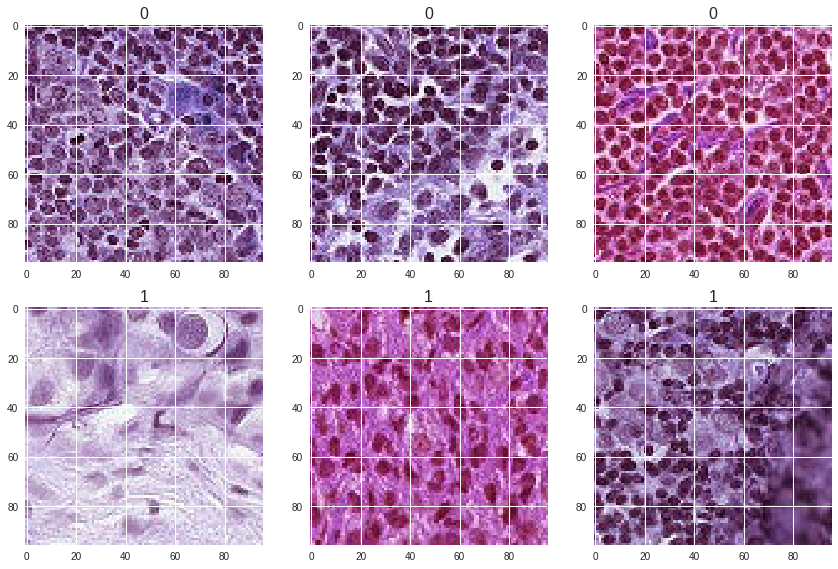

In [46]:
IMAGE_PATH = '/content/Histopathologic-Cancer-Detection/train/' 

draw_category_images('label',3, df_data, IMAGE_PATH)

In [47]:
# take a random sample of class 0 with size equal to num samples in class 1
df_0 = df_data[df_data['label'] == 0].sample(SAMPLE_SIZE, random_state = 101)
# filter out class 1
df_1 = df_data[df_data['label'] == 1].sample(SAMPLE_SIZE, random_state = 101)

# concat the dataframes
df_data_new = pd.concat([df_0, df_1], axis=0).reset_index(drop=True)
# shuffle
df_data_new = shuffle(df_data_new)

df_data_new['label'].value_counts()

1    80000
0    80000
Name: label, dtype: int64

In [48]:
# train_test_split

# stratify=y creates a balanced validation set.
y = df_data_new['label']

df_train, df_val = train_test_split(df_data_new, test_size=0.10, random_state=101, stratify=y)

print(df_train.shape)
print(df_val.shape)

(144000, 2)
(16000, 2)


In [49]:
df_train['label'].value_counts()

1    72000
0    72000
Name: label, dtype: int64

In [50]:
df_val['label'].value_counts()

1    8000
0    8000
Name: label, dtype: int64

In [0]:
base_dir = '/content/Histopathologic-Cancer-Detection/base_dir'

In [59]:

# Create a new directory
if not os.path.isdir('/content/Histopathologic-Cancer-Detection/base_dir'):
  base_dir = '/content/Histopathologic-Cancer-Detection/base_dir'
  os.mkdir(base_dir)
else:
  print('dir already exists')
  data_populated = True


dir already exists


In [62]:
#[CREATE FOLDERS INSIDE THE BASE DIRECTORY]

# now we create 2 folders inside 'base_dir':

# train_dir
    # a_no_tumor_tissue
    # b_has_tumor_tissue

# val_dir
    # a_no_tumor_tissue
    # b_has_tumor_tissue

if not data_populated:
  # create a path to 'base_dir' to which we will join the names of the new folders
  # train_dir
  train_dir = os.path.join(base_dir, 'train_dir')
  os.mkdir(train_dir)

  # val_dir
  val_dir = os.path.join(base_dir, 'val_dir')
  os.mkdir(val_dir)



  # [CREATE FOLDERS INSIDE THE TRAIN AND VALIDATION FOLDERS]
  # Inside each folder we create seperate folders for each class

  # create new folders inside train_dir
  no_tumor_tissue = os.path.join(train_dir, 'a_no_tumor_tissue')
  os.mkdir(no_tumor_tissue)
  has_tumor_tissue = os.path.join(train_dir, 'b_has_tumor_tissue')
  os.mkdir(has_tumor_tissue)


  # create new folders inside val_dir
  no_tumor_tissue = os.path.join(val_dir, 'a_no_tumor_tissue')
  os.mkdir(no_tumor_tissue)
  has_tumor_tissue = os.path.join(val_dir, 'b_has_tumor_tissue')
  os.mkdir(has_tumor_tissue)
else:
  print('sub directories already created')


sub directories already created


In [58]:

# check that the folders have been created
print(os.listdir(base_dir + '/train_dir'))
print(os.listdir(base_dir + '/val_dir'))


['a_no_tumor_tissue', 'b_has_tumor_tissue']
['a_no_tumor_tissue', 'b_has_tumor_tissue']


In [0]:

# Set the id as the index in df_data
df_data_new.set_index('id', inplace=True)


In [0]:
if not data_populated:

  # Get a list of train and val images
  train_list = list(df_train['id'])
  val_list = list(df_val['id'])

  train_src_dir = '/content/Histopathologic-Cancer-Detection/train'



  # Transfer the train images

  for image in train_list:

      # the id in the csv file does not have the .tif extension therefore we add it here
      fname = image + '.tif'
      # get the label for a certain image
      target = df_data_new.loc[image,'label']

      # these must match the folder names
      if target == 0:
          label = 'a_no_tumor_tissue'
      if target == 1:
          label = 'b_has_tumor_tissue'

      # source path to image
      src = os.path.join(train_src_dir, fname)
      # destination path to image
      dst = os.path.join(train_dir, label, fname)
      # copy the image from the source to the destination
      shutil.copyfile(src, dst)


  # Transfer the val images

  for image in val_list:

      # the id in the csv file does not have the .tif extension therefore we add it here
      fname = image + '.tif'
      # get the label for a certain image
      target = df_data_new.loc[image,'label']

      # these must match the folder names
      if target == 0:
          label = 'a_no_tumor_tissue'
      if target == 1:
          label = 'b_has_tumor_tissue'


      # source path to image
      src = os.path.join(train_src_dir, fname)
      # destination path to image
      dst = os.path.join(val_dir, label, fname)
      # copy the image from the source to the destination
      shutil.copyfile(src, dst)



   

In [69]:
print(len(os.listdir(os.path.join(base_dir, 'train_dir','a_no_tumor_tissue'))))
print(len(os.listdir(os.path.join(base_dir, 'train_dir','b_has_tumor_tissue'))))

72000
72000


In [70]:
print(len(os.listdir(os.path.join(base_dir, 'val_dir','a_no_tumor_tissue'))))
print(len(os.listdir(os.path.join(base_dir, 'val_dir','b_has_tumor_tissue'))))

8000
8000


In [71]:
train_path = base_dir + '/train_dir'
valid_path = base_dir + '/val_dir'
test_path = '/content/Histopathologic-Cancer-Detection/test'

num_train_samples = len(df_train)
num_val_samples = len(df_val)
train_batch_size = 10
val_batch_size = 10


train_steps = np.ceil(num_train_samples / train_batch_size)
val_steps = np.ceil(num_val_samples / val_batch_size)

print(num_train_samples)
print(num_val_samples)

144000
16000


In [72]:
datagen = ImageDataGenerator(rescale=1.0/255)

train_gen = datagen.flow_from_directory(train_path,
                                        target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                        batch_size=train_batch_size,
                                        class_mode='categorical')

val_gen = datagen.flow_from_directory(valid_path,
                                        target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                        batch_size=val_batch_size,
                                        class_mode='categorical')

# Note: shuffle=False causes the test dataset to not be shuffled
test_gen = datagen.flow_from_directory(valid_path,
                                        target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                        batch_size=1,
                                        class_mode='categorical',
                                        shuffle=False)

Found 144000 images belonging to 2 classes.
Found 16000 images belonging to 2 classes.
Found 16000 images belonging to 2 classes.


In [73]:
kernel_size = (3,3)
pool_size= (2,2)
first_filters = 32
second_filters = 64
third_filters = 128

dropout_conv = 0.3
dropout_dense = 0.3


model = Sequential()
model.add(Conv2D(first_filters, kernel_size, activation = 'relu', input_shape = (96, 96, 3)))
model.add(Conv2D(first_filters, kernel_size, activation = 'relu'))
model.add(Conv2D(first_filters, kernel_size, activation = 'relu'))
model.add(MaxPooling2D(pool_size = pool_size)) 
model.add(Dropout(dropout_conv))

model.add(Conv2D(second_filters, kernel_size, activation ='relu'))
model.add(Conv2D(second_filters, kernel_size, activation ='relu'))
model.add(Conv2D(second_filters, kernel_size, activation ='relu'))
model.add(MaxPooling2D(pool_size = pool_size))
model.add(Dropout(dropout_conv))

model.add(Conv2D(third_filters, kernel_size, activation ='relu'))
model.add(Conv2D(third_filters, kernel_size, activation ='relu'))
model.add(Conv2D(third_filters, kernel_size, activation ='relu'))
model.add(MaxPooling2D(pool_size = pool_size))
model.add(Dropout(dropout_conv))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(dropout_dense))
model.add(Dense(2, activation = "softmax"))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 94, 94, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 92, 92, 32)        9248      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 90, 90, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 45, 45, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 43, 43, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 41, 41, 64)        36928     
__________

In [0]:
model.compile(Adam(lr=0.0001), loss='binary_crossentropy', 
              metrics=['accuracy'])

In [75]:
print(val_gen.class_indices)

{'a_no_tumor_tissue': 0, 'b_has_tumor_tissue': 1}


In [0]:
filepath = "model.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, 
                             save_best_only=True, mode='max')

reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=2, 
                                   verbose=1, mode='max', min_lr=0.00001)
                              
                              
callbacks_list = [checkpoint, reduce_lr]

history = model.fit_generator(train_gen, steps_per_epoch=train_steps, 
                    validation_data=val_gen,
                    validation_steps=val_steps,
                    epochs=20, verbose=1,
                   callbacks=callbacks_list)